### REGIÃO COLETADA

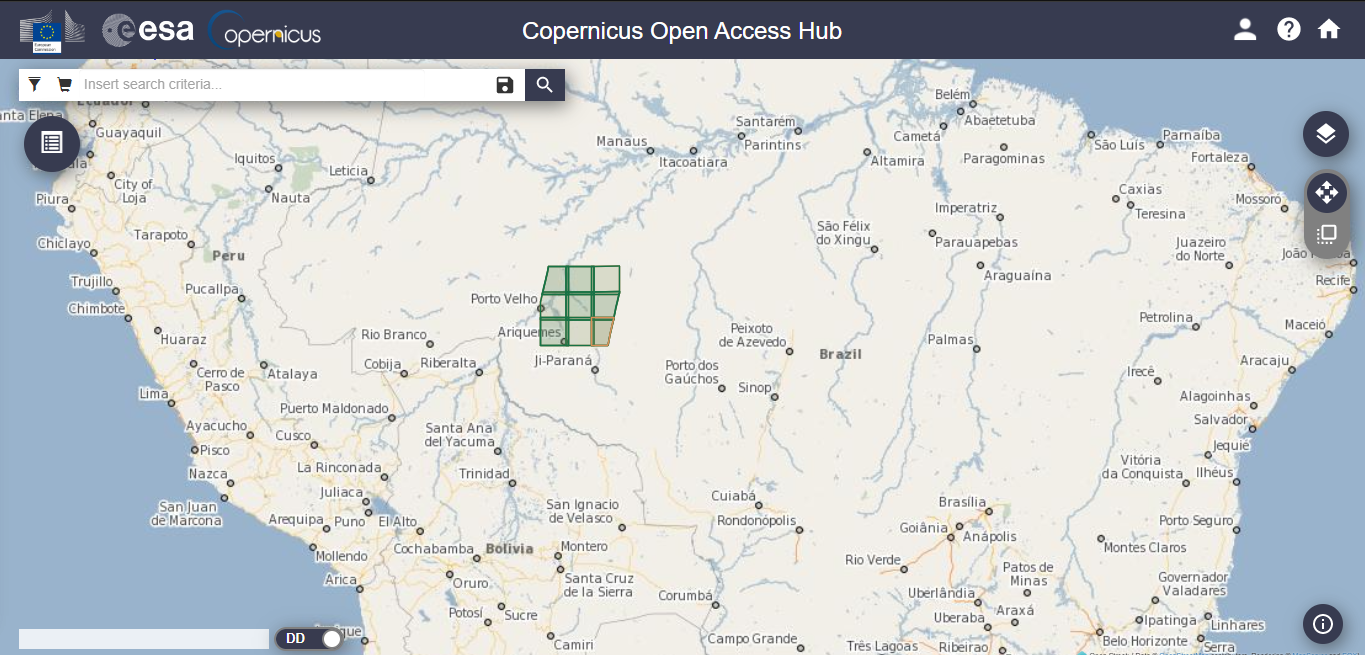

In [1]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jun_image_path = 'C:/Users/cedua/CDIA - PUCSP/PROJETO FINAL 4º SEMESTRE (ROONEY)/Calculating-deforestation-using-satellite-images/data/JUL2021'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green 
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [3]:
print(band4.count)
print(band4.width)
print(band4.height)
print(band4.dtypes)

1
1830
1830
('uint16',)


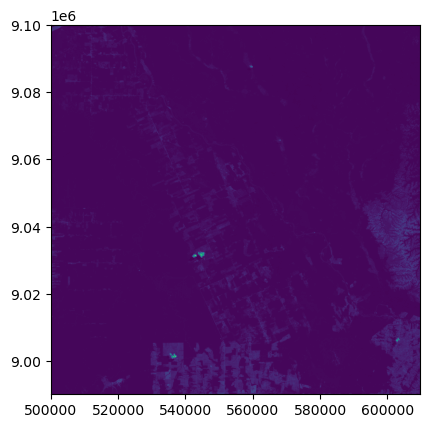

<AxesSubplot:>

In [4]:
plot.show(band4)

In [5]:
#converting a matriz array into a rasterio
band4.transform

Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 9100000.0)

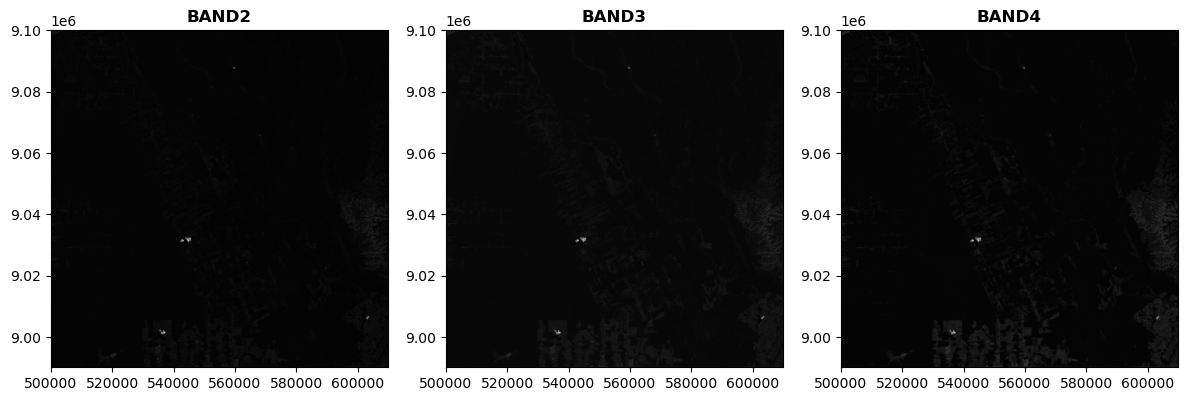

In [6]:
#different bands in colormap
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='gray', title='BAND2')
plot.show(band3, ax=ax2, cmap='gray', title='BAND3')
plot.show(band4, ax=ax3, cmap='gray', title='BAND4')
fig.tight_layout()

### Create NDVI 
Calculating Normalized Difference Vegetation Index (NDVI) is an important indicator to assess the presence/absence of green vegetation from the satellite images. To calculate the NDVI, you need Red band and Near-Infrared Band (NIR). Different satellite images assign different numbers for this band. Sentinel Images have red in 4th band and NIR in the 8th band. The formula for NDVI calculation is:
nir - red /(nir + red).

To carry out this in Rasterio we need first to read the 4th and 8th bands as arrays. We also need to make sure that the arrays are floats.

##### IMAGES JUL/2021

In [8]:
red = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [10]:
def ndvi_result(red_value, nir_value):
    return (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)

In [11]:
def ndvi_plot(red_value, nir_value):
    ndvi = (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)
    
    fig, ax = plt.subplots(1, figsize=(18, 18))
    return plot.show(ndvi)

In [12]:
ndvi_result(red, nir)

array([[[0.89815818, 0.89736701, 0.89374817, ..., 0.90206813,
         0.89448108, 0.87858347],
        [0.88078237, 0.89157631, 0.89598893, ..., 0.9069475 ,
         0.89048811, 0.89496718],
        [0.89419898, 0.88058806, 0.88017366, ..., 0.89835361,
         0.88443616, 0.89694149],
        ...,
        [0.87867759, 0.88440025, 0.88881356, ..., 0.7554559 ,
         0.65838926, 0.70205237],
        [0.88421386, 0.8902439 , 0.89047915, ..., 0.88138686,
         0.8746406 , 0.87764706],
        [0.887078  , 0.89013813, 0.88211788, ..., 0.8870411 ,
         0.88740741, 0.88871122]]])

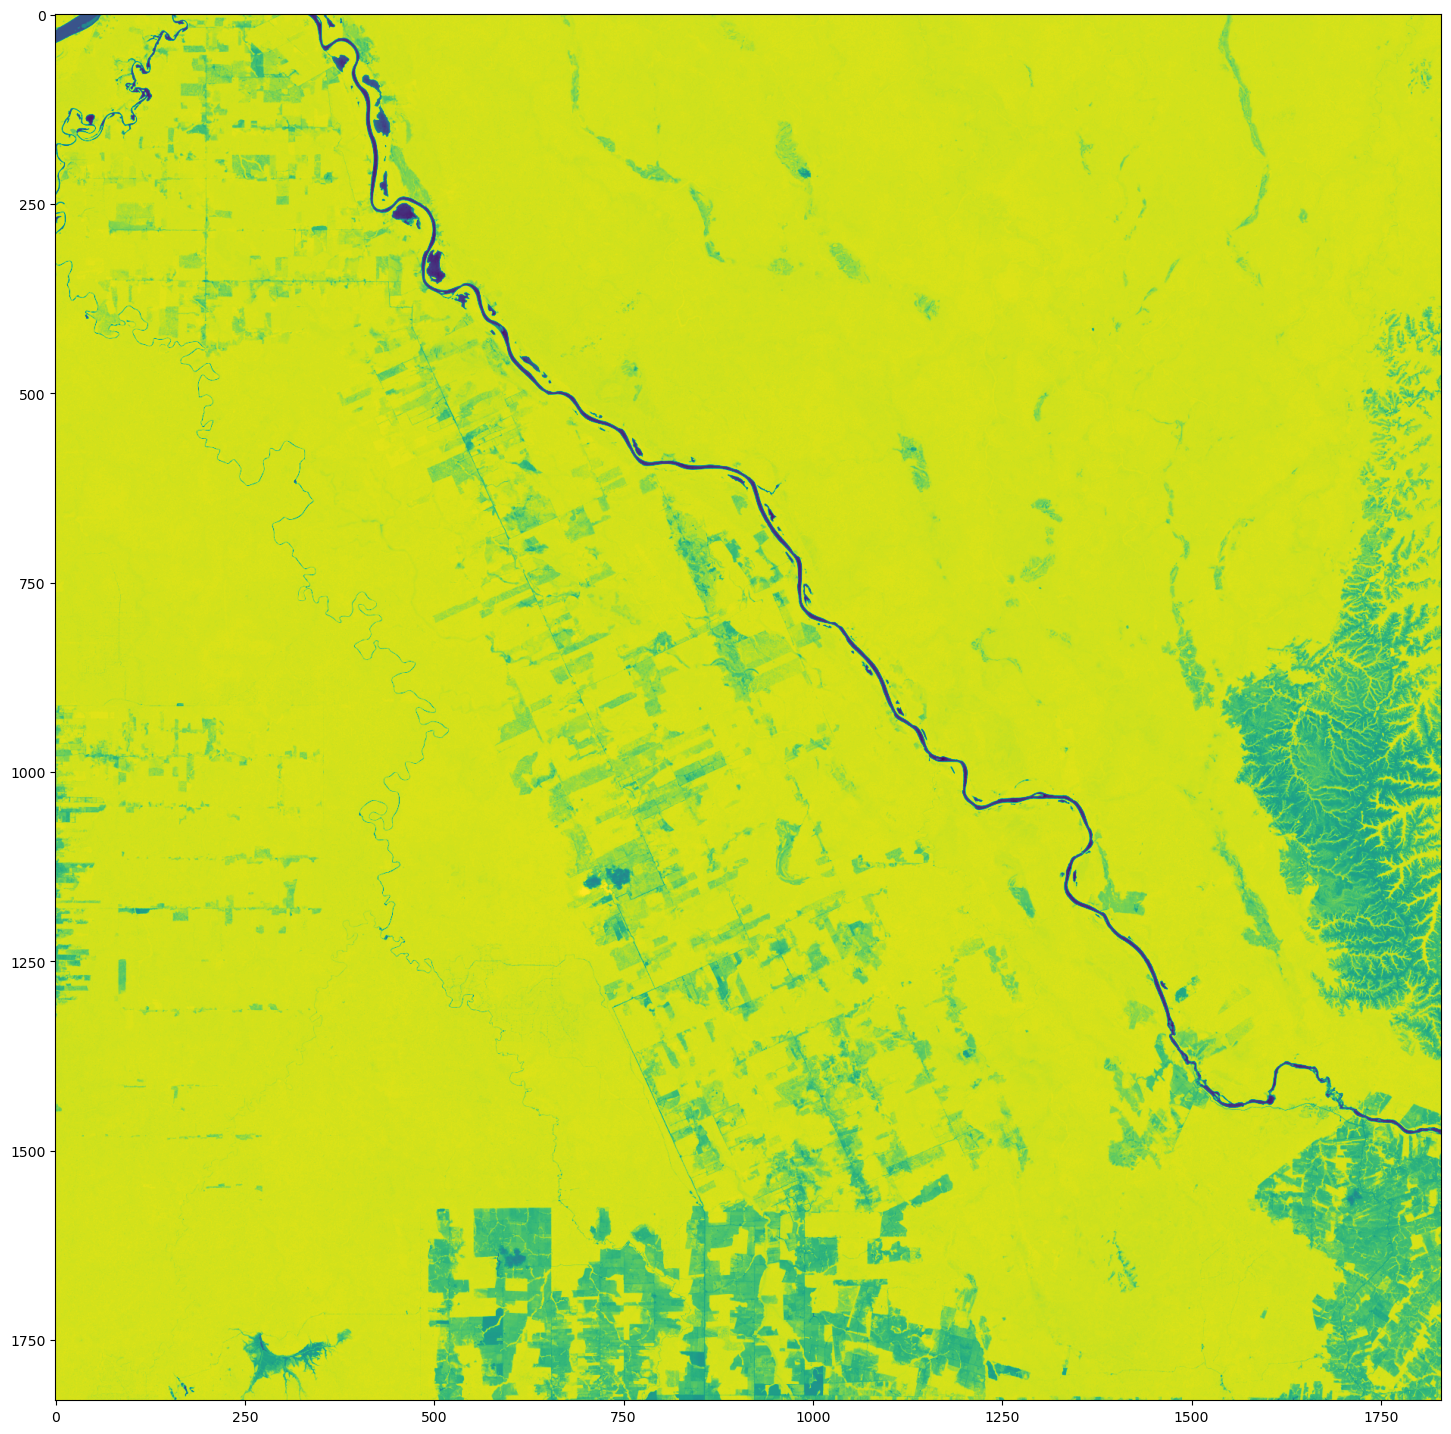

<AxesSubplot:>

In [13]:
ndvi_plot(red, nir)

##### IMAGES NOV/2022

In [18]:
nov_images_path = "C:/Users/cedua/CDIA - PUCSP/PROJETO FINAL 4º SEMESTRE (ROONEY)/Calculating-deforestation-using-satellite-images/data/NOV2022"
band2 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B02_60m.jp2', driver='JP2OpenJPEG') #green
band3 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

In [19]:
red_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

In [20]:
ndvi_result(red_nov, nir_nov)

array([[[0.59819141, 0.61800662, 0.60130816, ..., 0.59618233,
         0.56646579, 0.57574711],
        [0.59250868, 0.59830994, 0.61412175, ..., 0.57682884,
         0.5689415 , 0.58613728],
        [0.58889582, 0.57751331, 0.58431005, ..., 0.57426941,
         0.5546277 , 0.57720207],
        ...,
        [0.55548139, 0.57131346, 0.53893866, ..., 0.53030303,
         0.50974026, 0.48871182],
        [0.54832181, 0.54096141, 0.54896043, ..., 0.56292985,
         0.5610752 , 0.55789474],
        [0.54689851, 0.52397498, 0.5308255 , ..., 0.5679702 ,
         0.59076331, 0.55727821]]])

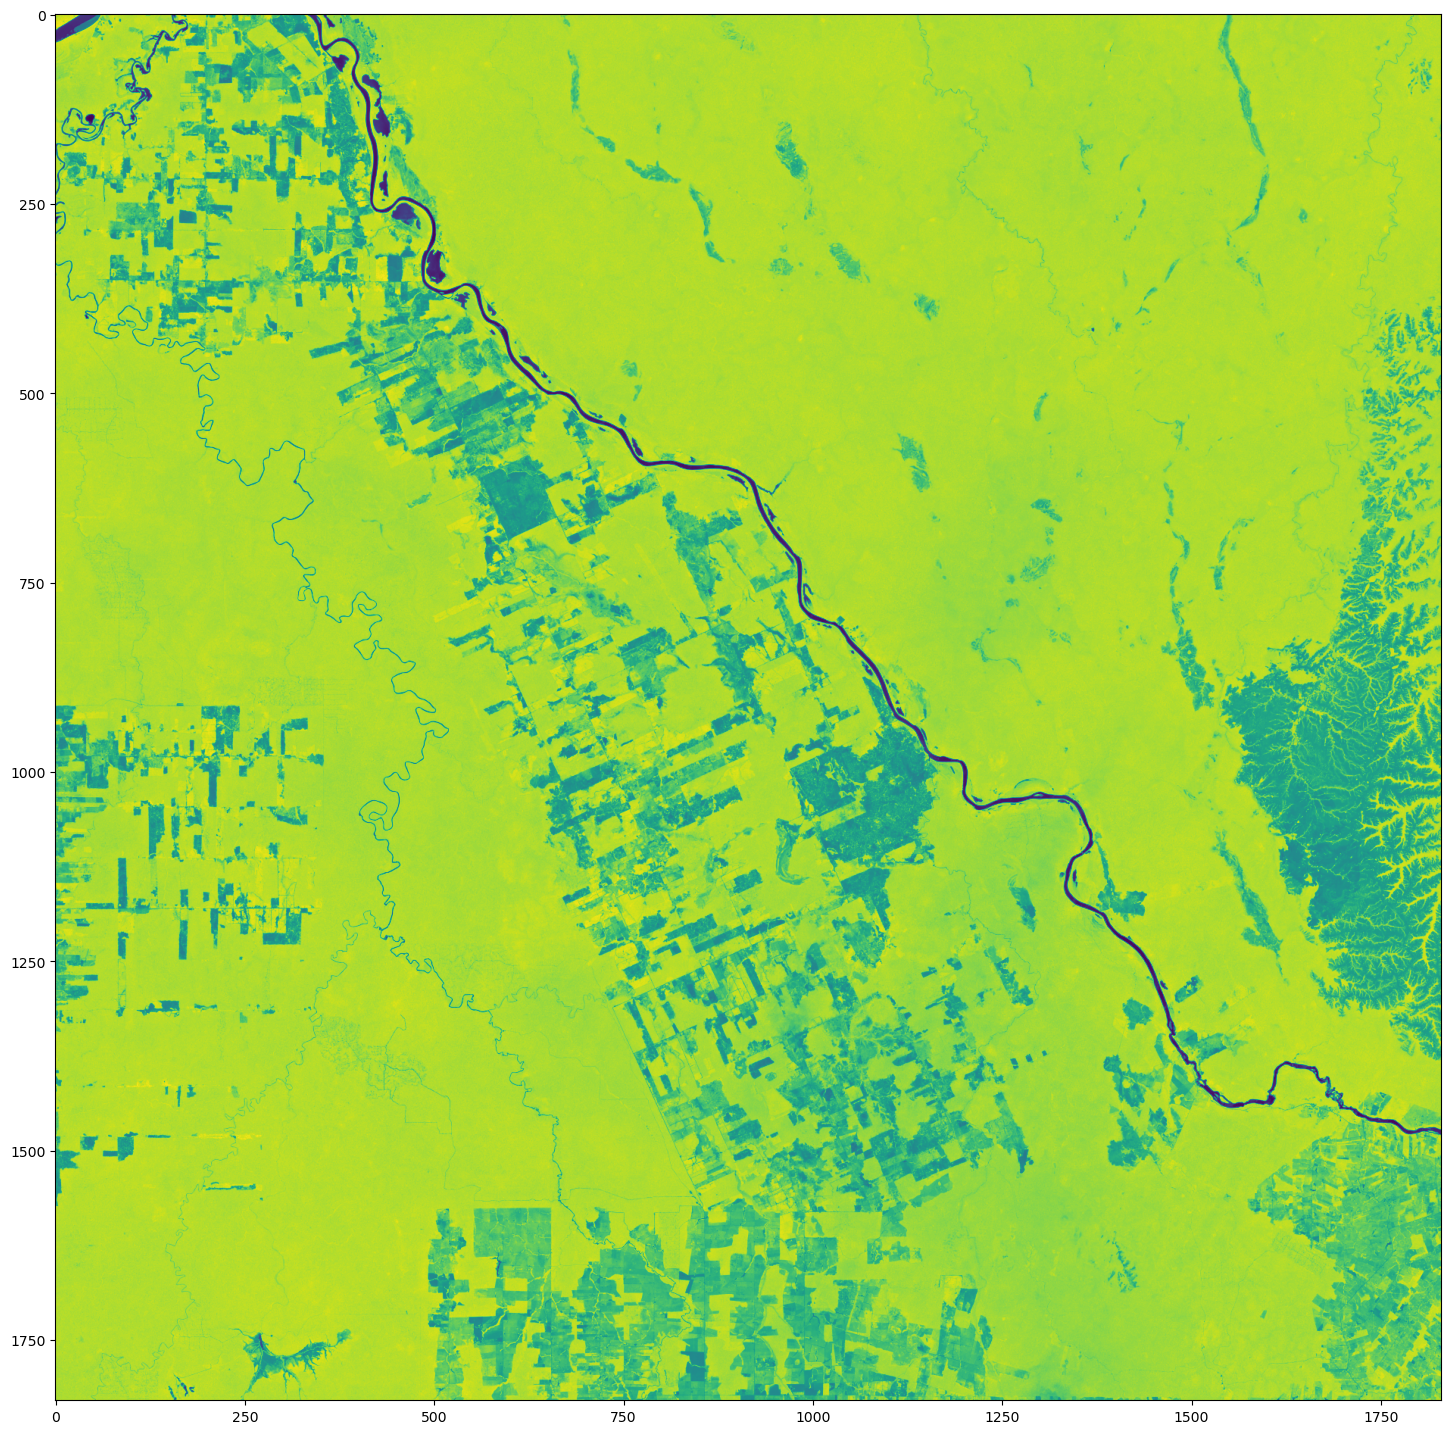

<AxesSubplot:>

In [21]:
ndvi_plot(red_nov, nir_nov)